# WeatherPy

In [1]:
#!pip install requests
#!pip install gmaps
#!pip install citipy
#!pip3 install -U matplotlib

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

np.random.seed(42)
#weather_api_key

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

# Perform API Calls

In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
#api key from api key file
api_key = '6a99cfd9156c43b9a85ce9fab62c3b63'
units = 'imperial'
finalurl=f'{url}appid={api_key}&units={units}&q='
response = requests.get(finalurl+'Boston').json()
print (response)

{'coord': {'lon': -71.0598, 'lat': 42.3584}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 32.5, 'feels_like': 25.03, 'temp_min': 30.99, 'temp_max': 34, 'pressure': 994, 'humidity': 84}, 'visibility': 10000, 'wind': {'speed': 5.99, 'deg': 17, 'gust': 13}, 'clouds': {'all': 100}, 'dt': 1612311868, 'sys': {'type': 3, 'id': 2013408, 'country': 'US', 'sunrise': 1612266994, 'sunset': 1612303160}, 'timezone': -18000, 'id': 4930956, 'name': 'Boston', 'cod': 200}


In [4]:
#url
url = 'http://api.openweathermap.org/data/2.5/weather?'
#api key from api key file
api_key = '6a99cfd9156c43b9a85ce9fab62c3b63'
units = 'imperial'
finalurl=f'{url}appid={api_key}&units={units}&q='
#Lists to call data
name = []
lat = []
lng = []
max_temp = []
cloudiness = []
humidity = []
wind_speed = []
country = []
date = []
record=0

print(f'Beginning Data Retrevial')
print(f'------------------------')

for city in cities:
    response = requests.get(finalurl+city).json()
    #print (response)
    
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        city_record = response['name']
        print(f'Processing Record {record} of {record} | {city_record}')
        record = record+1
    except:
        #print('City not found.Skippin....')
        pass
    
print(f'-----------------------')
print(f'Data Retreival Complete')

Beginning Data Retrevial
------------------------
Processing Record 0 of 0 | Henties Bay
Processing Record 1 of 1 | Bethel
Processing Record 2 of 2 | Saint-François
Processing Record 3 of 3 | Ushuaia
Processing Record 4 of 4 | Mar del Plata
Processing Record 5 of 5 | Kruisfontein
Processing Record 6 of 6 | Brønnøysund
Processing Record 7 of 7 | Yumen
Processing Record 8 of 8 | Albany
Processing Record 9 of 9 | Dikson
Processing Record 10 of 10 | Ossora
Processing Record 11 of 11 | Vaini
Processing Record 12 of 12 | Castro
Processing Record 13 of 13 | Vanimo
Processing Record 14 of 14 | San Cristobal
Processing Record 15 of 15 | Ulladulla
Processing Record 16 of 16 | ‘Ewa Beach
Processing Record 17 of 17 | Bluff
Processing Record 18 of 18 | Departamento de Maldonado
Processing Record 19 of 19 | Mataura
Processing Record 20 of 20 | Jamestown
Processing Record 21 of 21 | Geraldton
Processing Record 22 of 22 | Punta Arenas
Processing Record 23 of 23 | Mitú
Processing Record 24 of 24 | Tura

Processing Record 206 of 206 | Huilong
Processing Record 207 of 207 | Saldanha
Processing Record 208 of 208 | Suoyarvi
Processing Record 209 of 209 | Chapais
Processing Record 210 of 210 | Plettenberg Bay
Processing Record 211 of 211 | Tottori-shi
Processing Record 212 of 212 | Abu Samrah
Processing Record 213 of 213 | Forsytheganj
Processing Record 214 of 214 | Ashland
Processing Record 215 of 215 | Dingle
Processing Record 216 of 216 | Yining
Processing Record 217 of 217 | Belmonte
Processing Record 218 of 218 | Carnarvon
Processing Record 219 of 219 | Gravelbourg
Processing Record 220 of 220 | Warmbad
Processing Record 221 of 221 | Lukovetskiy
Processing Record 222 of 222 | Torbay
Processing Record 223 of 223 | Khovd
Processing Record 224 of 224 | Meulaboh
Processing Record 225 of 225 | Pouébo
Processing Record 226 of 226 | Upernavik
Processing Record 227 of 227 | Los Andes
Processing Record 228 of 228 | Leningradskiy
Processing Record 229 of 229 | Sinnamary
Processing Record 230 of

Processing Record 409 of 409 | Knyaze-Volkonskoye
Processing Record 410 of 410 | Peniche
Processing Record 411 of 411 | Matagami
Processing Record 412 of 412 | South Valley
Processing Record 413 of 413 | Mehamn
Processing Record 414 of 414 | São José da Coroa Grande
Processing Record 415 of 415 | Sabang
Processing Record 416 of 416 | Rovaniemi
Processing Record 417 of 417 | Fukuechō
Processing Record 418 of 418 | Naghadeh
Processing Record 419 of 419 | Ayabaca
Processing Record 420 of 420 | Catuday
Processing Record 421 of 421 | Yinzhu
Processing Record 422 of 422 | Bandarbeyla
Processing Record 423 of 423 | Toora-Khem
Processing Record 424 of 424 | College
Processing Record 425 of 425 | Klyuchi
Processing Record 426 of 426 | Noumea
Processing Record 427 of 427 | Furtwangen im Schwarzwald
Processing Record 428 of 428 | Punta de Bombón
Processing Record 429 of 429 | Tessalit
Processing Record 430 of 430 | Aykhal
Processing Record 431 of 431 | Conde
Processing Record 432 of 432 | Cohoes


# Convert Raw Data to DataFrame

In [5]:
town_df = pd.DataFrame({'City': name, 'Lat': lat, 'Lng': lng, 'Max Temp': max_temp,
                         'Humidity': humidity, 'Cloudiness': cloudiness, 
                         'Wind Speed': wind_speed, 'Country': country, 'Date': date})


town_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Henties Bay,-22.1160,14.2845,64.99,87,9,6.08,NA,1612312157
1,Bethel,41.3712,-73.4140,28.40,86,90,9.22,US,1612312157
2,Saint-François,46.4154,3.9054,55.40,76,90,6.91,FR,1612312158
3,Ushuaia,-54.8000,-68.3000,55.40,71,75,28.77,AR,1612312108
4,Mar del Plata,-38.0023,-57.5575,66.99,82,75,6.91,AR,1612312151


In [6]:
town_df.to_csv(r'../output_data/cities.csv', index=False)

In [7]:
stats = town_df.describe()

# Inspect the data and remove the cities where the humidity > 100%.

In [8]:
humidity = town_df.loc[town_df['Humidity']>100]
humidity.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
#  Get the indices of cities that have humidity over 100%.
indices = town_df.index[town_df['Humidity'] > 100].tolist()
print(indices)

[]


In [10]:
#  Get the indices of cities that have humidity over 100%.
rows = town_df.index[indices]
town_df.reset_index
clean_town_data = town_df.drop(rows, inplace=True)
clean_town_data


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_town_data = town_df
len(clean_town_data)

544

# Plotting the Data

# Latitude vs. Temperature Plot

In [12]:
#dataTypeSeries = clean_town_data.dtypes
#print(dataTypeSeries)

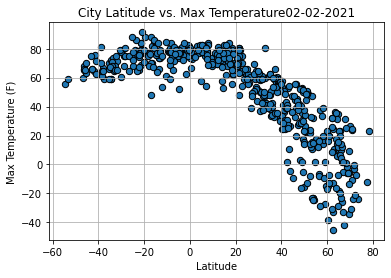

In [49]:

ts = pd.Timestamp.today().strftime('%m-%d-%Y')
clean_town_data.plot(kind="scatter", x="Lat", y="Max Temp", marker="o", s=40, facecolors="green", edgecolors="black", grid=True, title="City Latitude vs. Max Temperature" + ts)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("../output_data/Latitude_vs_Max_Temp.png")
plt.show()

# Latitude vs. Humidity Plot

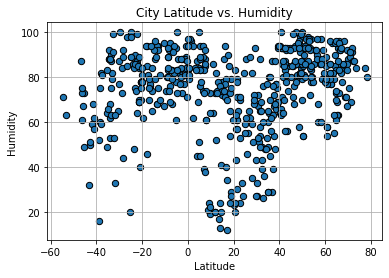

In [14]:
ts = pd.Timestamp.today().strftime('%m-%d-%Y')
clean_town_data.plot(kind="scatter", x="Lat", y="Humidity", marker="o", s=40, facecolors="green", edgecolor="black", grid=True, title="City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("../output_data/Latitude_vs_Humidity.png")

# Latitude vs. Cloudiness Plot

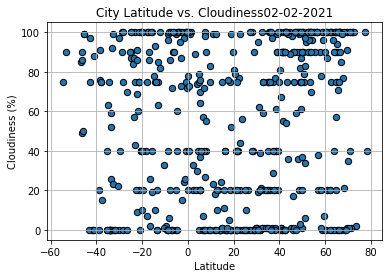

In [17]:
ts = pd.Timestamp.today().strftime('%m-%d-%Y')
clean_town_data.plot(kind="scatter", x="Lat", y="Cloudiness", marker="o", s=40, facecolor="green", edgecolors="black", grid=True, title="City Latitude vs. Cloudiness" + ts)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../output_data/Latitude_vs_Cloudiness.png")
plt.show()

# Latitude vs. Wind Speed Plot

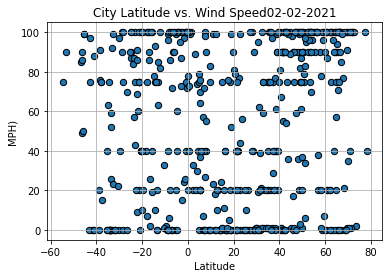

In [22]:
ts = pd.Timestamp.today().strftime('%m-%d-%Y')
clean_town_data.plot(kind="scatter", x="Lat", y="Cloudiness", marker="o", s=40, facecolor="green", edgecolors="black", grid=True, title="City Latitude vs. Wind Speed" + ts)
plt.xlabel('Latitude')
plt.ylabel('MPH)')
plt.savefig("../output_data/Latitude_vs_Wind_Speed.png")
plt.show()

# Linear Regression

In [27]:
north = clean_town_data.loc[clean_town_data['Lat']>0]
south = clean_town_data.loc[clean_town_data['Lat']<0]

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7329456119461059


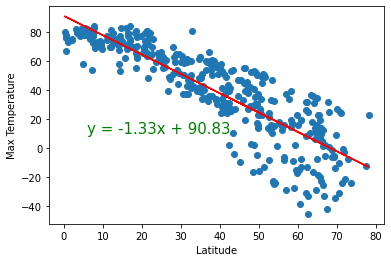

In [30]:
x_values = north['Lat']
y_values = north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_value,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f'The r-squared is: {rvalue**2}')
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs Latitude Linear Regression.png")
plt.show()

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2123701479558099


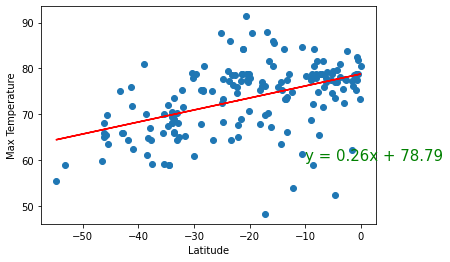

In [33]:
x_values = south['Lat']
y_values = south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_value,"r-")
plt.annotate(line_eq,(-10,60),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f'The r-squared is: {rvalue**2}')
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs Latitude Linear Regression.png")
plt.show()

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14934939110022366


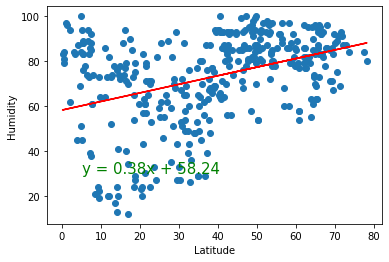

In [34]:
x_values = north['Lat']
y_values = north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_value,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-squared is: {rvalue**2}')
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs Latitude Linear Regression.png")
plt.show()

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r_squared is: 0.16362962121377292


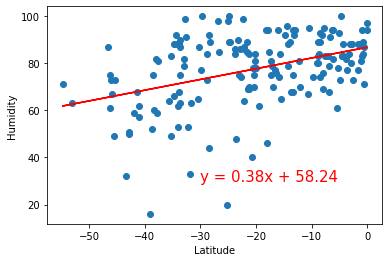

In [38]:
#Add the linear regession equation and line to plot 
#axis values
x_values = south['Lat']
y_values = south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_ep = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
#creating plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,'r-')
#adding line equation to plot
plt.annotate(line_eq,(-30,30), fontsize=15, color='red')
#setting y axis title
plt.xlabel('Latitude')
#setting y axis title
plt.ylabel('Humidity')
#displays r value
print(f'The r_squared is: {rvalue**2}')
#save plot as png
plt.savefig('../output_data/Southern Hemisphere - Humidity (%) vs. Latitude linear Regression.png')
plt.show()

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r_squared is: 0.11387292945975888


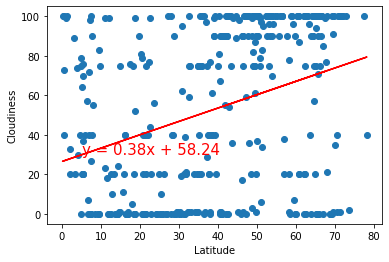

In [41]:
#Add the linear regession equation and line to plot 
#axis values
x_values = north['Lat']
y_values = north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_ep = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
#creating plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,'r-')
#adding line equation to plot
plt.annotate(line_eq,(5,30), fontsize=15, color='red')
#setting y axis title
plt.xlabel('Latitude')
#setting y axis title
plt.ylabel('Cloudiness')
#displays r value
print(f'The r_squared is: {rvalue**2}')
#save plot as png
plt.savefig('../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude linear Regression.png')
plt.show()

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r_squared is: 0.0166155227540099


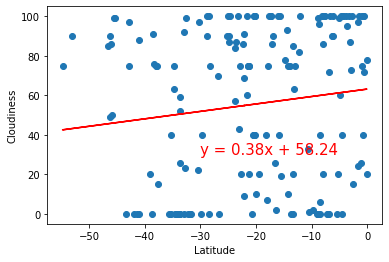

In [43]:
#Add the linear regession equation and line to plot 
#axis values
x_values = south['Lat']
y_values = south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_ep = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
#creating plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,'r-')
#adding line equation to plot
plt.annotate(line_eq,(-30,30), fontsize=15, color='red')
#setting y axis title
plt.xlabel('Latitude')
#setting y axis title
plt.ylabel('Cloudiness')
#displays r value
print(f'The r_squared is: {rvalue**2}')
#save plot as png
plt.savefig('../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude linear Regression.png')
plt.show()

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r_squared is: 0.0363919324884344


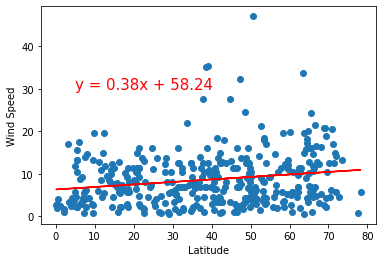

In [45]:
#Add the linear regession equation and line to plot 
#axis values
x_values = north['Lat']
y_values = north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_ep = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
#creating plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,'r-')
#adding line equation to plot
plt.annotate(line_eq,(5,30), fontsize=15, color='red')
#setting y axis title
plt.xlabel('Latitude')
#setting y axis title
plt.ylabel('Wind Speed')
#displays r value
print(f'The r_squared is: {rvalue**2}')
#save plot as png
plt.savefig('../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude linear Regression.png')
plt.show()

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r_squared is: 0.03420066522086096


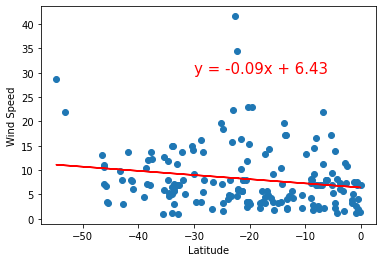

In [48]:
#Add the linear regession equation and line to plot 
#axis values
x_values = south['Lat']
y_values = south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_ep = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
#creating plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
#adding line equation to plot
plt.annotate(line_ep, (-30,30), fontsize=15, color='red')
#setting y axis title
plt.xlabel('Latitude')
#setting y axis title
plt.ylabel('Wind Speed')
#displays r value
print(f'The r_squared is: {rvalue**2}')
#save plot as png
plt.savefig('../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude linear Regression.png')
plt.show()